<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Simulating Stochastic Processes</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Marc de Kamps and University of Leeds</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

### Learning Outcomes

In Numpy, it is fairly straightforward to generate samples from a distribution. This is notebook is a kind of self-assessment. Are you able to use randomisers and generating data accoding to some common distributions

At the end of this notebook you should be able to:
- Select a random generator for the uniform distribution
- Set its seed
- Inspect simple distributions visually
- Implement Bernoulli and Binomial distributions, or use Numpy functions to that effect
- Explain how samples from a uniform distribution can transformed into samples of other distributions


### Preparation

- Consult the following link as an entry for random process generation: https://numpy.org/doc/stable/reference/random/index.html
- Read up on random number generators. The Wikipedia entry is a decent enough start: https://en.wikipedia.org/wiki/Random_number_generation. For an introduction to the more technical aspects, the book *Numerical Recipes in C*, by Press *et al* contains an informative chapter.

In [1]:
import numpy as np
from scipy.stats import uniform

# Create a random number generator
rng = np.random.default_rng()

# Generate 10 uniformly distributed numbers between 0 and 1 using the random generator
samples = uniform.rvs(size=10, random_state=rng)

print(samples)


[0.65910122 0.63037961 0.77876623 0.08997522 0.24643693 0.62455281
 0.84360128 0.28490309 0.80272042 0.262204  ]


### The *scipy.stats* Module
To generate samples according to various distributions, *numpy.random* is convenient. Above you see an example of how to generate 10 random values.

**Exercise 1**: note down some of the values that were printed. Now go to the top menu of the notebook, select *Kernel*
and select *Restart & Clear Output*. Run the notebook again. Comment on whether you observe the same values.
If the numbers change every time you restart the book, is this desirable? 
- Comment on situations were this is potentially valuable. 

There are also good reasons for this to be undesirable. 

- State at least one reason for why this is undesirable behaviour.
- If this undesirable behaviour, investigate how you can use a seed to prevent it.

### Common Sense: looking at your data.
**Exercise 2**: Generate 10000 data points and histogram them in the interval $[0,1]$. The histogram should be approximately flat. Ensure the results are completely reproducible: upon restarting the notebook and running it again the same results should be produced.

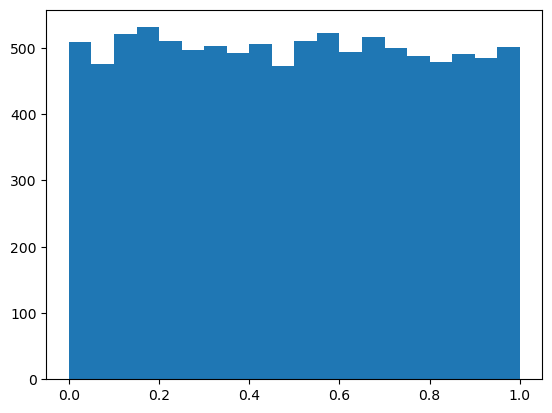

In [3]:
# Sample Answer! (remove)

import numpy as np 
import matplotlib.pyplot as plt

# Create a random number generator with a seed so that identical results are produced in different runs.
rng = np.random.default_rng(seed=42)


# Generate 10 uniformly distributed numbers between 0 and 1 using the random generator
samples = uniform.rvs(size=10000, random_state=rng)


n_bins = 20
hist, bin_edges,_=plt.hist(samples,n_bins)



**Exercise**: Generate 10000 data points $(x,y)$ that are uniformly distributed in the interval $[0,1] \times [0,1]$. Make a scatter plot of the sample and comment on whether the result is as expected.


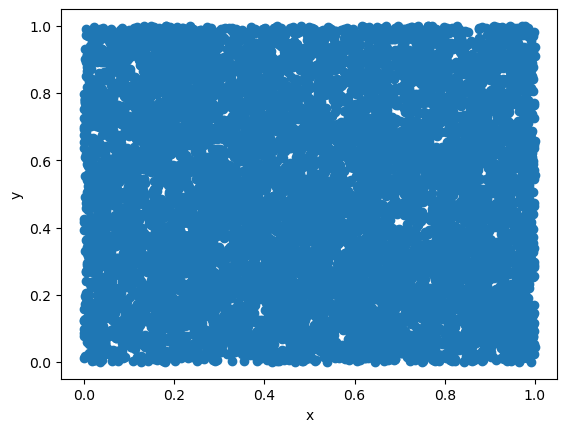

In [7]:
# Sample Answer ! (remove)

# Generate 10 uniformly distributed numbers between 0 and 1 using the random generator
xs = uniform.rvs(size=10000, random_state=rng)
ys = uniform.rvs(size=10000, random_state=rng)

plt.scatter(xs,ys)
_=plt.xlabel('x')
_=plt.ylabel('y')

**Exercise 3**: Investigate how you can change the aspect ratio of a plot in the notebook and how you can change the dpi (dots per inch). Experiment to make a plot that you find visually attractive: change marker color and type, as well as size. Save the plot as a pdf file.

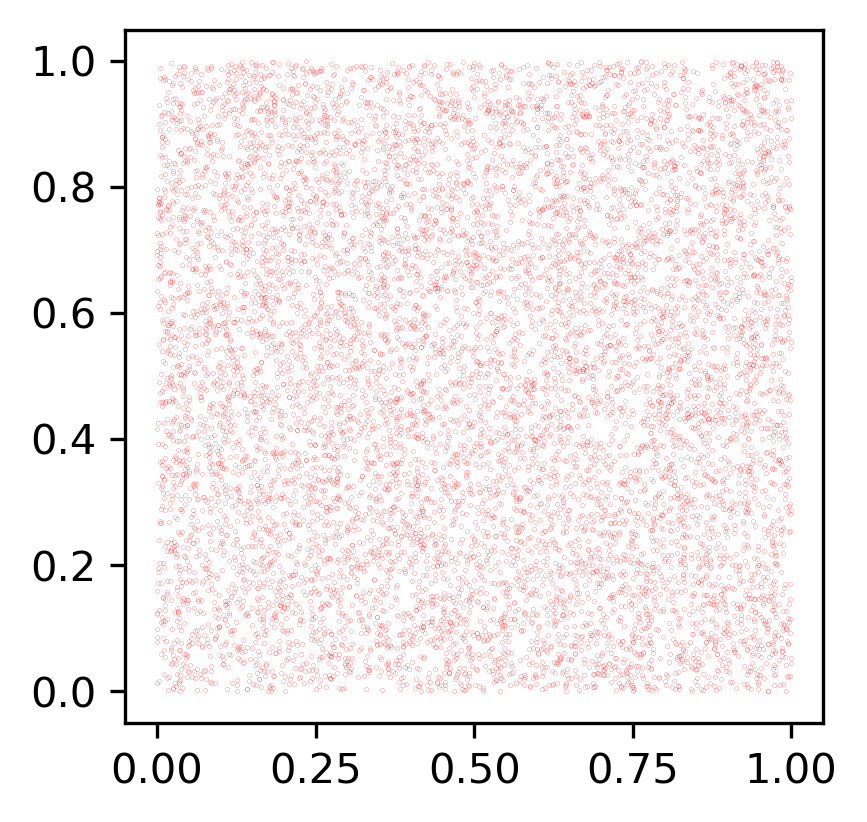

In [9]:
# Sample Answer ! (remove)
plt.rcParams['figure.figsize'] = [3, 3]
plt.rcParams['figure.dpi'] = 300

plt.plot(xs,ys,'r.',markersize=0.1)


**Exercise 4:** Now that you can simulate uniformly distributed numbers, it is not hard to simulate a Bernoulli process. Simulate a sample of 1000 uniformly distributed events ($[0,1]$), think of a way of converting them into a sequence generated by a Bernoulli process with $\mu = 0.4$. Implement this in Python and perform some common sense checks to whether the result is reasonable.

In [12]:
# Sample Answer! (remove)
import numpy as np
from numpy.random import default_rng

# create a random generator with seddd
rng = default_rng(seed = 12)

# sample from the uniform distribution
xs = uniform.rvs(size=10000, random_state=rng)

# create a list comprehension of 0s and 1s. Covert the values above to a 1 if they are below mu and to  0 otherwise
mu = 0.4
b = [ 1 if x <= mu else 0 for x in xs]

# print the first 10 values 
print(b[:10])

# the number of ones should be approximately 4000 for mu = 0.4
print(np.array(b).sum()) 

[1, 0, 1, 1, 1, 1, 0, 1, 0, 0]
3975


**Exercise**: Design and implement a function simulate a Bernoulli sample of arbitrary length. Use this as a basis for a function that generates binomial samples. Generate a sample of 10000 $\mbox{Bin}(N=10,p=0.25)$ events. Plot a histogram of the sample that you generated.

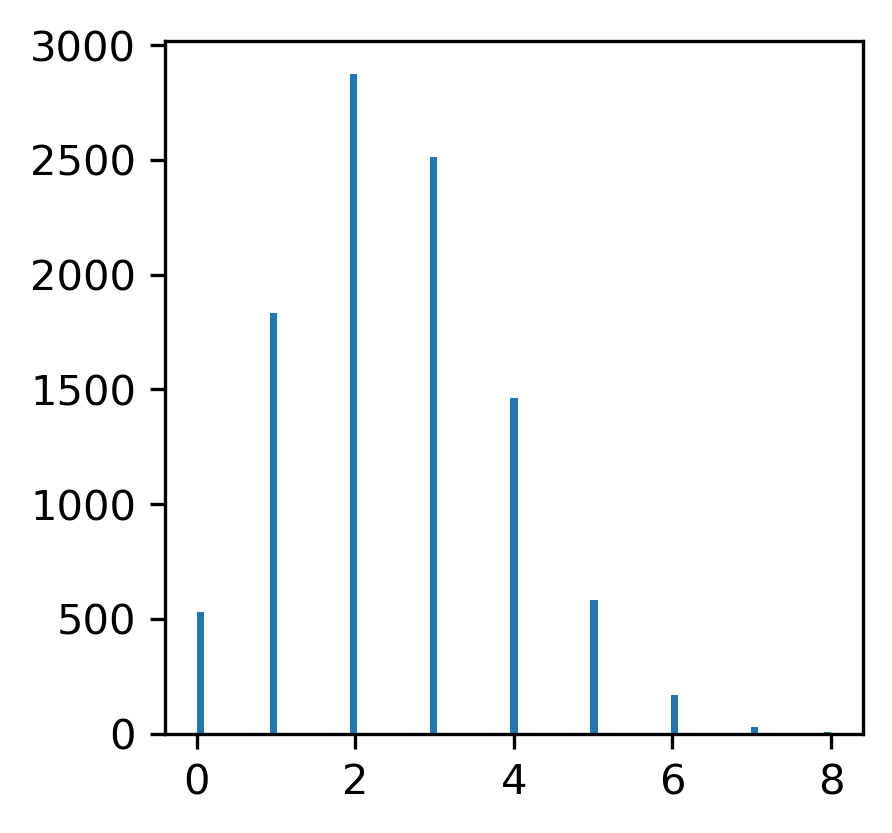

In [13]:
# Sample Answer! (remove)

def bern(mu, size, rng):
    xs = uniform.rvs(size=size)
    b = [1 if x < mu else 0 for x in xs]
    return np.array(b)
    
def bin(N, p, size, rng): 
    return np.array([ bern(p,N,rng).sum() for i in range(size) ])

vals=bin(10,0.25,10000,rng)
hist, bin_edges,_=plt.hist(vals,bins ='auto',density=False)
    

**Exercise** Research the *scipy.stats.binom* method. Use the method to repeat the previous experiment. Also, research whether a method *bernoulli* exists. If not, explain why not.

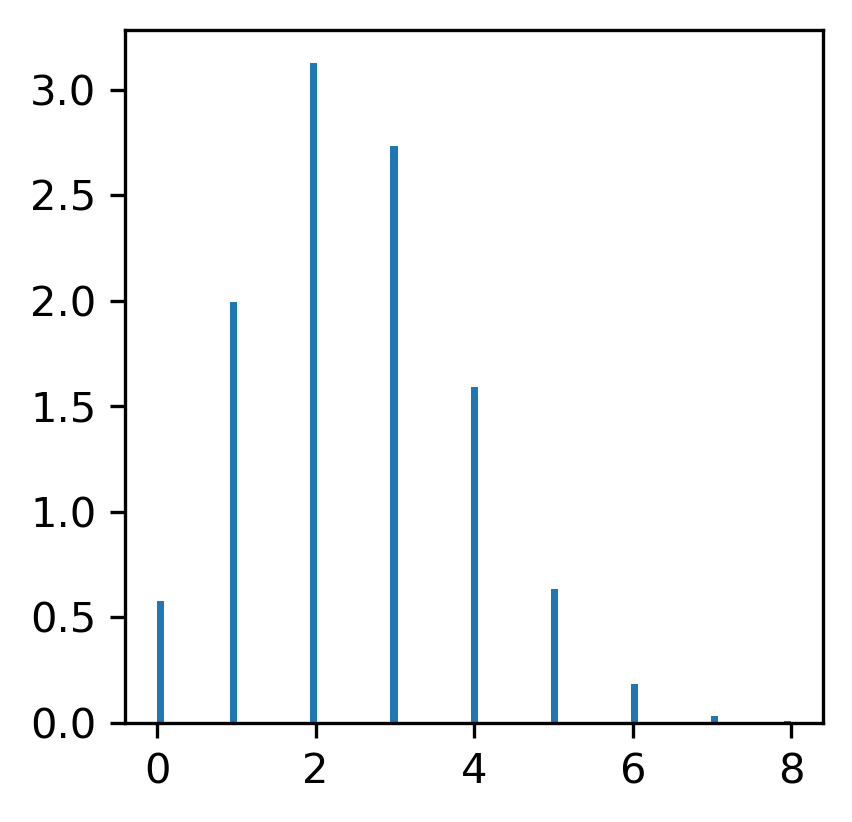

In [16]:
# Sample Answer! (remove)
from scipy.stats import binom

sample = binom.rvs(10,0.25,size=1000)
hist, bin_edges,_=plt.hist(vals,bins ='auto',density=True)

## The Moral of the Story (so far)

The really hard bit about generating random numbers is the generation of uniformly distributed random numbers. Once this is in place, discrete stochastic processes can be modelled relatively easily, although numpy.random provides a convenient front end for most distributions. Feel free to experiment with other distributions.

## Continuous Distributions

**Optional Exercise**

It sounds much harder to model a continuous distribution based on a uniform sample, but it is straightforward (in one dimension). If we apply a function $f(x)$ to a uniform distribution, it is no longer uniform. Let's apply the function $f(x) = x^{2}$ to a sample of uniformly distributed events in the interval $[0,1]$. Do this and plot
a histogram of the resulting distribution. Use 50 bins for your histogram.

Also plot the function $g(x) = 100/\sqrt(x)$.



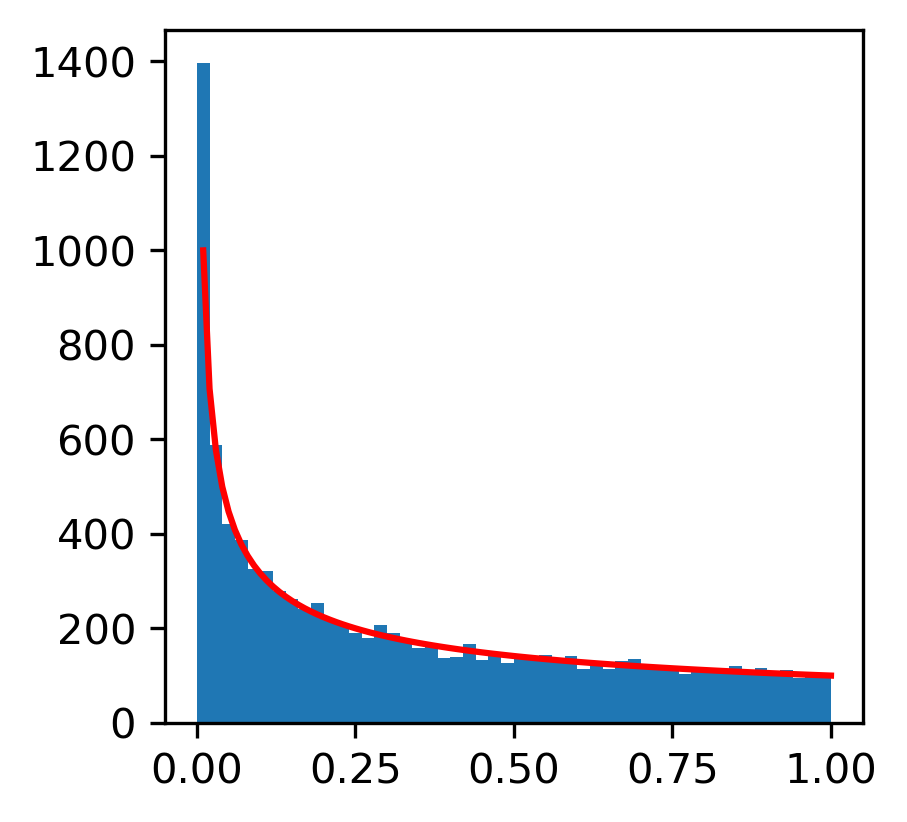

In [21]:
# Sample Answer! (remove)

# apply the square function to a random sample
xs = uniform.rvs(size=10000, random_state=rng)
sqs = xs**2

# histogram the sample
n_bins = 50
hist, bin_edges,_=plt.hist(sqs,n_bins)

# plot the function, don't include x = 0, for obvious reasons 
x = np.linspace(0.01,1,100)
y = 100./np.sqrt(x)

plt.plot(x,y,'r-')

If all went well, you have simulated samples distributed with a distribution $g(x) = 100/\sqrt(x)$. Try to reason why it worked out this way.
At the very least, try to understand why a function applied to a sample generated by the homogeneous distribution
is  no longer uniform. The moral of the story is that it is easy to sculpt distributions into a desired shape, once a good algorithm for generating uniformly distributed events is available.

A full explanantion can be found here: https://en.wikipedia.org/wiki/Inverse_transform_sampling